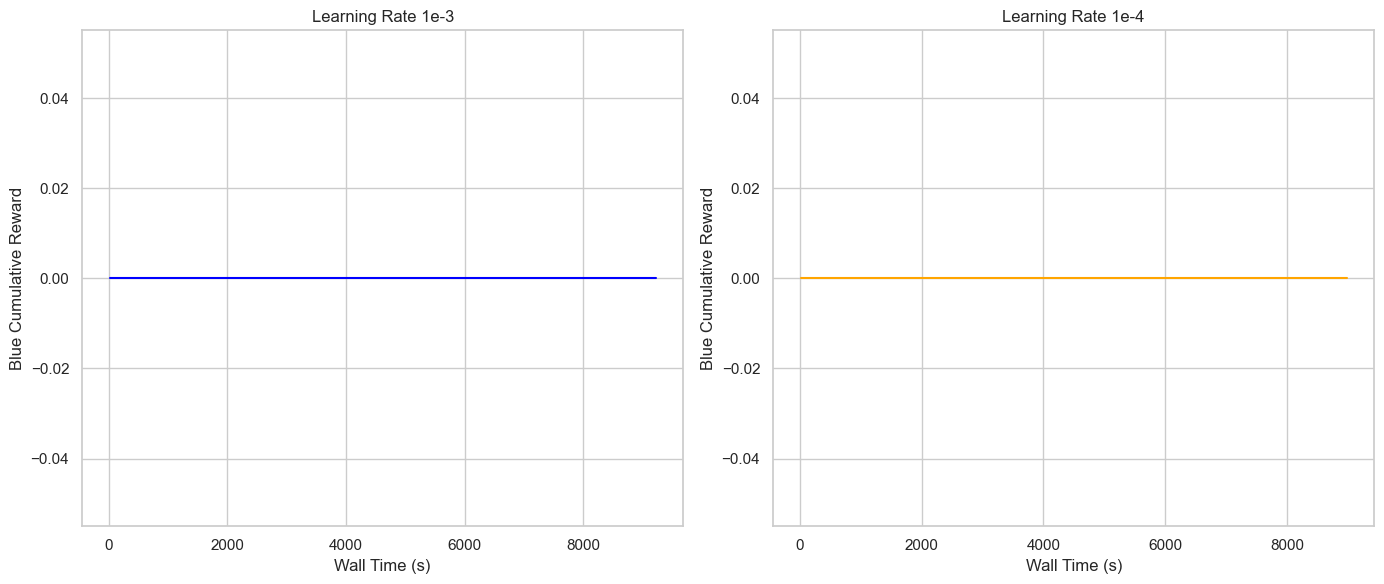

In [19]:
# Enable inline plotting for Jupyter Lab
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define file paths for each batch size
file_paths_512 = [
    '/Users/mac/Documents/UM/UM-Old/Year_2/PROJECT2_1/AIML-UM-14/AIML/Project/stats/LR-1-1.csv',
    '/Users/mac/Documents/UM/UM-Old/Year_2/PROJECT2_1/AIML-UM-14/AIML/Project/stats/LR-1-2.csv',
    '/Users/mac/Documents/UM/UM-Old/Year_2/PROJECT2_1/AIML-UM-14/AIML/Project/stats/LR-1-3.csv'
]

file_paths_5120 = [
    '/Users/mac/Documents/UM/UM-Old/Year_2/PROJECT2_1/AIML-UM-14/AIML/Project/stats/LR-2-1.csv',
    '/Users/mac/Documents/UM/UM-Old/Year_2/PROJECT2_1/AIML-UM-14/AIML/Project/stats/LR-2-2.csv',
    '/Users/mac/Documents/UM/UM-Old/Year_2/PROJECT2_1/AIML-UM-14/AIML/Project/stats/LR-2-3.csv'
]

def process_data(file_paths):
    dfs = [pd.read_csv(fp) for fp in file_paths]
    
    # Determine the minimum length among all runs
    min_length = min(len(df) for df in dfs)
    
    # Trim all DataFrames to the minimum length
    trimmed_dfs = [df.iloc[:min_length].reset_index(drop=True) for df in dfs]
    
    # Calculate the average using groupby with level=0
    avg_df = pd.concat(trimmed_dfs).groupby(level=0).mean().reset_index(drop=True)
    
    # Convert Wall Time from ms to seconds
    avg_df['Wall Time (s)'] = avg_df['Wall Time (ms)'] / 1000
    
    # Create a new column for 30-second intervals
    avg_df['Interval_30s'] = (avg_df['Wall Time (s)'] // 30) * 30
    
    # Group by the 30-second intervals and calculate the mean
    cleaned_avg_df = avg_df.groupby('Interval_30s').mean().reset_index()
    
    return cleaned_avg_df

# Process data for each batch size
cleaned_avg_df_512 = process_data(file_paths_512)
cleaned_avg_df_5120 = process_data(file_paths_5120)

# Plot Wall Time vs Blue Cumulative Reward for both batch sizes
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Batch Size 512
sns.lineplot(ax=axes[0], x='Wall Time (s)', y='Blue Cumulative Reward', data=cleaned_avg_df_512, color='blue')
axes[0].set_title('Learning Rate 1e-3')
axes[0].set_xlabel('Wall Time (s)')
axes[0].set_ylabel('Blue Cumulative Reward')
axes[0].grid(True)

# Plot for Batch Size 5120
sns.lineplot(ax=axes[1], x='Wall Time (s)', y='Blue Cumulative Reward', data=cleaned_avg_df_5120, color='orange')
axes[1].set_title('Learning Rate 1e-4')
axes[1].set_xlabel('Wall Time (s)')
axes[1].set_ylabel('Blue Cumulative Reward')
axes[1].grid(True)

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('walltime_vs_blue_cumulative_comparison.png')
plt.show()